# Similarity of lamina circuits

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import seaborn as sns
import itertools
from sklearn.linear_model import LinearRegression

from src.dataframe_tools import assemble_cxvectors
from vis.hex_lattice import hexplot
from vis.fig_tools import linear_cmap, subtype_cm

plt.rcdefaults()
plt.style.use('vis/lamina.mplstyle')

In [42]:
### SAVE FIGS? ###
save_figs=True
##################

In [43]:
# Load dataframe of om->[connection counts]
tp = '200914'
lamina_links = pd.read_pickle(f'~/Data/{tp}_lamina/{tp}_linkdf.pickle')
subtypes = np.unique([*lamina_links["pre_type"], *lamina_links["post_type"]])

all_ctypes = [p for p in itertools.product(subtypes, subtypes)]  
all_ctype_labels = [f"{pre}->{post}" for pre, post in all_ctypes]
ommatidia = ommatidia = np.unique(lamina_links['pre_om'])

cxvecs = assemble_cxvectors(lamina_links)

In [44]:
# Filtering criteria
#unknowns = [c for c in df_lamina.columns if 'UNKNOWN' in c]   # discard columns involving connections to unidentified arbors
#df = df_lamina.drop(unknowns, axis=1).astype(float).dropna('columns')  # dropna effectively discards L4 associated connections
thresh = 3.0

cxvecs = cxvecs.loc[:, cxvecs.mean() > thresh].fillna(0)  # filter out connections with mean less than 1
cxvecs = cxvecs.rename_axis(index='om')

In [45]:
# Specifies colors for DRA and non-DRA ommatidia
def om_colors(om_list):
    dra_om = ['A5', 'B5', 'B6', 'C5', 'C6', 'D6', 'D7', 'E7']
    c_list = []
    for o in om_list:
        if str(o) in dra_om:
            c_list.append('darkviolet')
        else:
            c_list.append('darkgreen')
    return c_list

## Clustering by all connection types

## Clustering by connection counts

### All connections

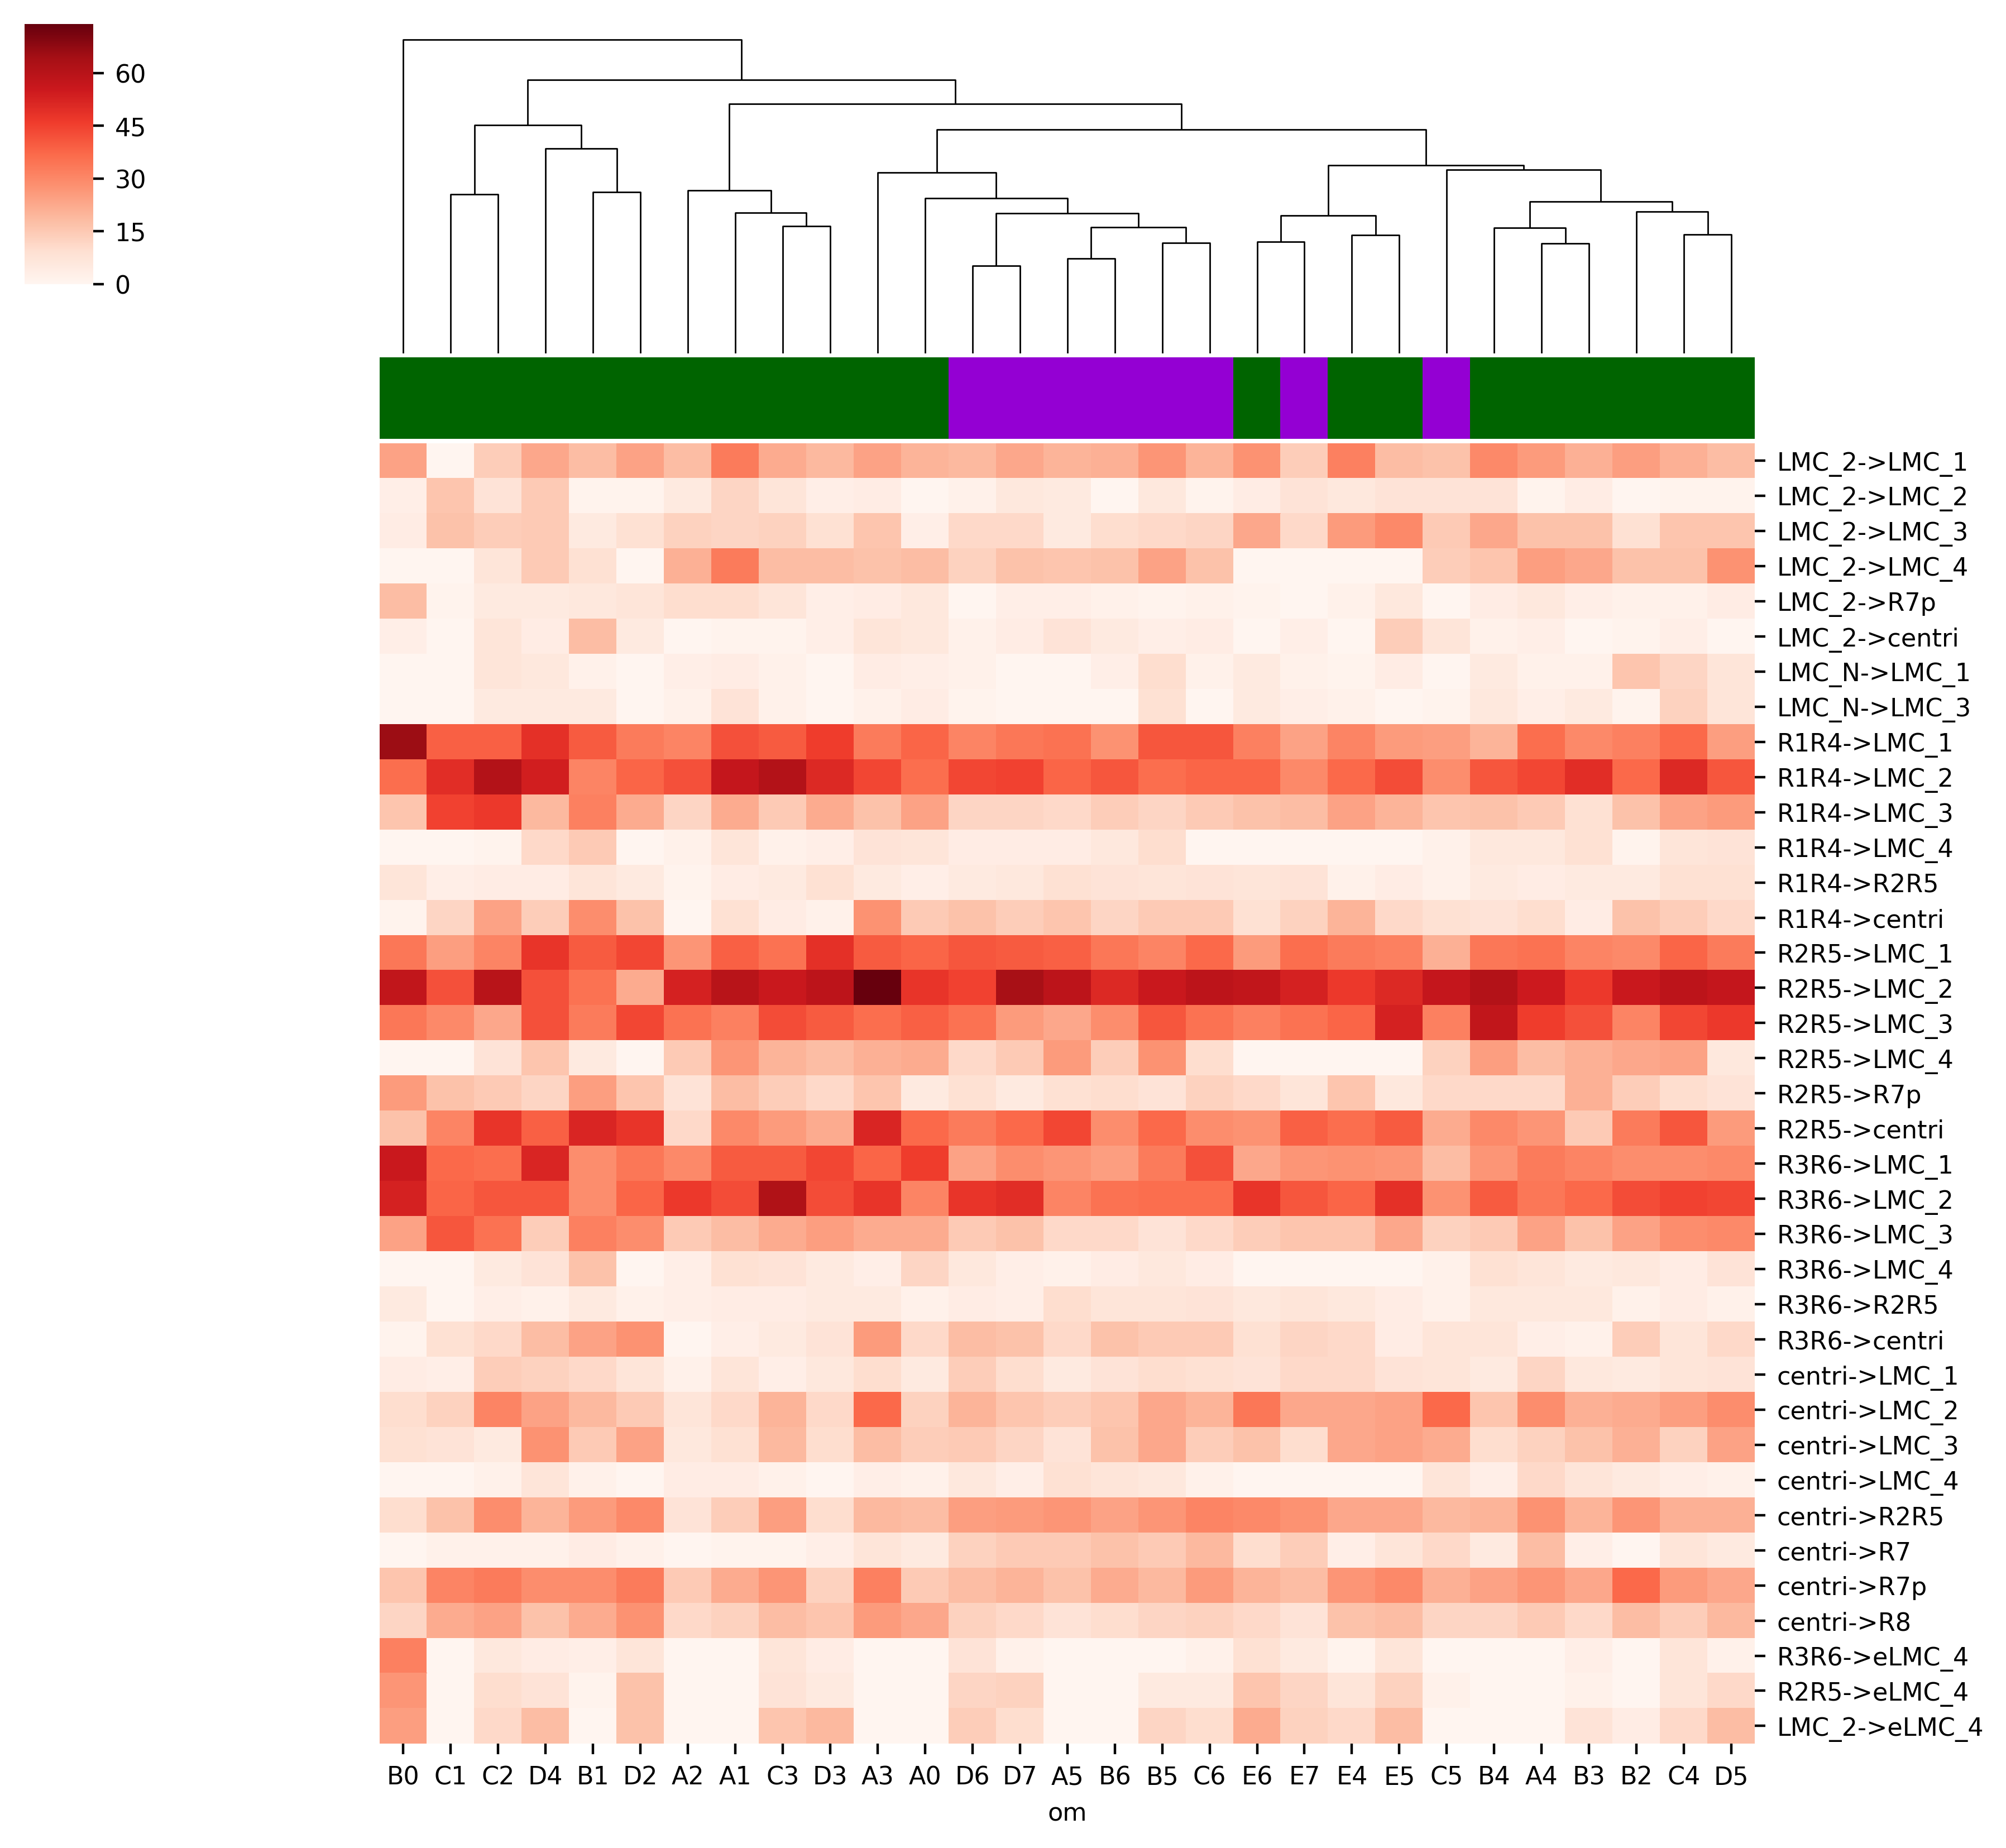

In [46]:
data = cxvecs.T
c_list = om_colors(data.columns)
clus = sns.clustermap(data, row_cluster=False, col_colors=c_list, yticklabels=data.index, metric='euclidean', 
                      method='complete', cmap='Reds')
plt.show()

if save_figs:
    clus.savefig(f'/mnt/home/nchua/Dropbox/lamina_figures/om_clus_allcx_thresh{thresh}.svg')
    clus.savefig(f'/mnt/home/nchua/Dropbox/lamina_figures/om_clus_allcx_thresh{thresh}.png')

### Home connections

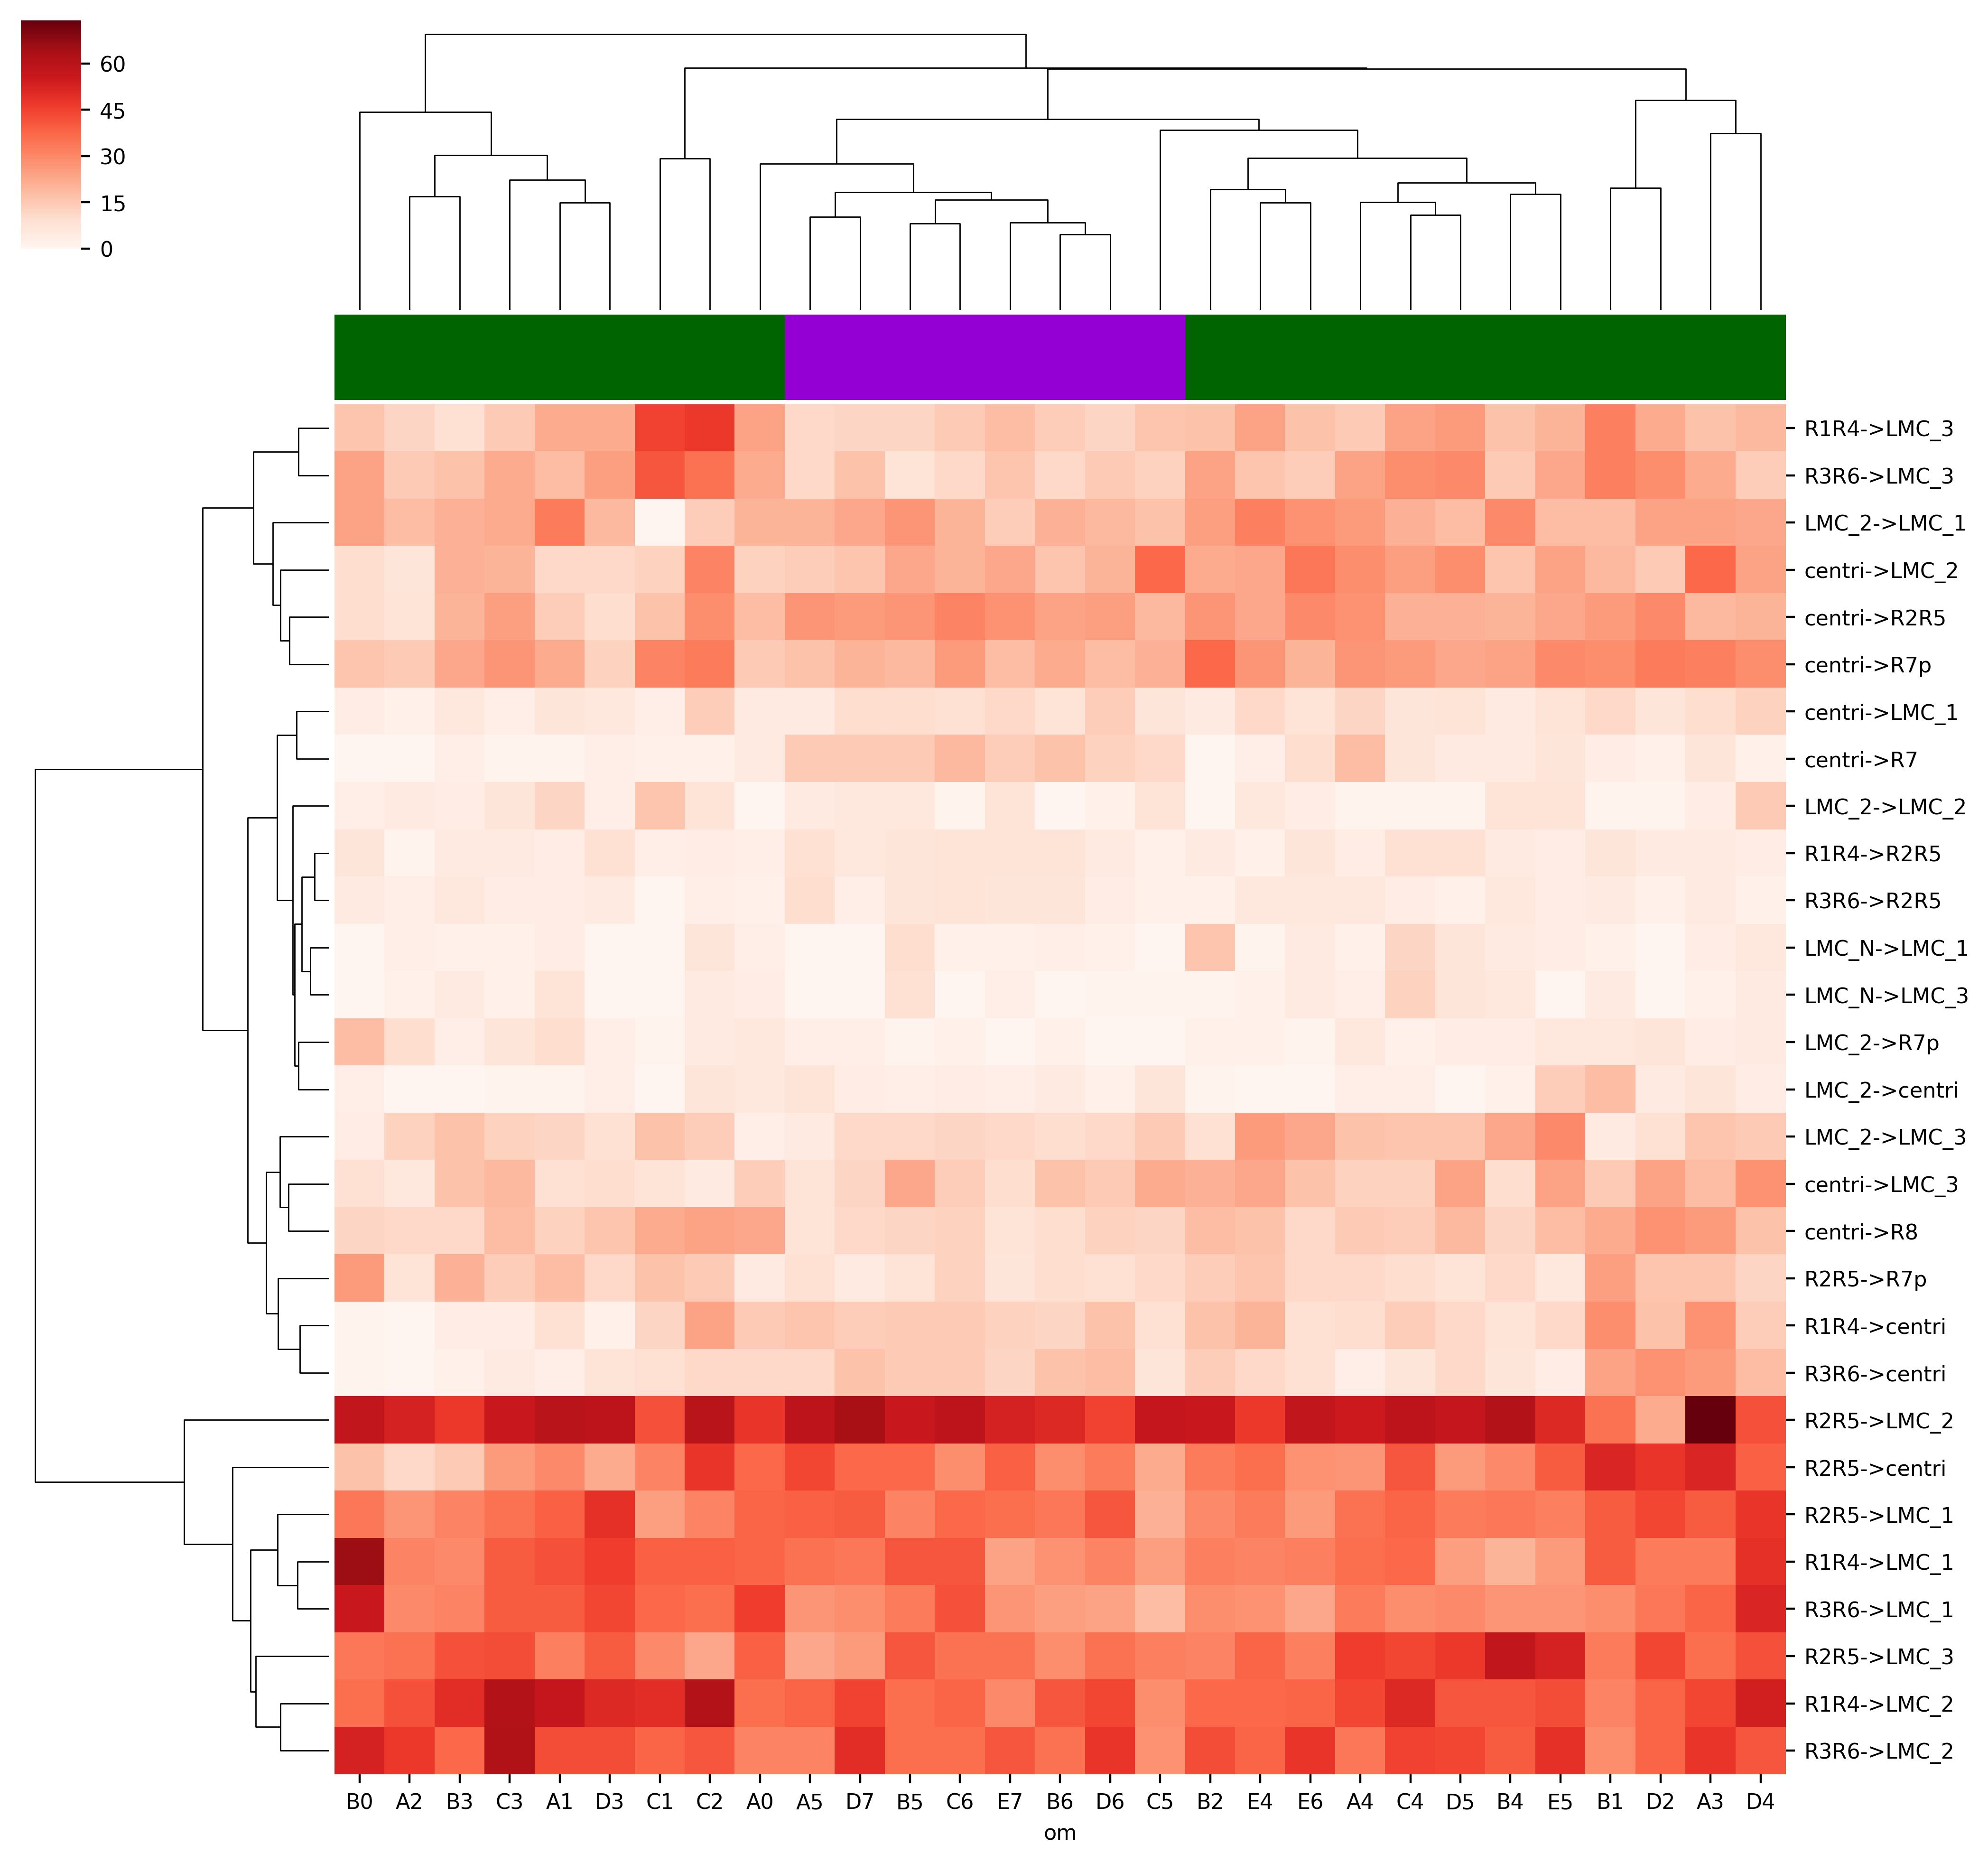

In [47]:
data = cxvecs.loc[:, [i for i in cxvecs.columns if ('LMC_4' not in i) and ('eLMC_2' not in i)]].T
c_list = om_colors(data.columns)
clus = sns.clustermap(data, row_cluster=True, col_colors=c_list, figsize=[12,12], cmap='Reds',
                      yticklabels=data.index, metric='euclidean', method='complete')
plt.show()

if save_figs:
    clus.savefig(f'/mnt/home/nchua/Dropbox/lamina_figures/om_clus_homecx_thresh{thresh}.svg')
    clus.savefig(f'/mnt/home/nchua/Dropbox/lamina_figures/om_clus_homecx_thresh{thresh}.png')

## Clustering by z-score of connection counts

In [48]:
z_scores = pd.DataFrame(index=cxvecs.index, columns=cxvecs.columns)

for cx, vec in cxvecs.T.iterrows():
    z_scores.loc[:, cx] = (vec - vec.mean())/vec.std(ddof=0)

### All connections

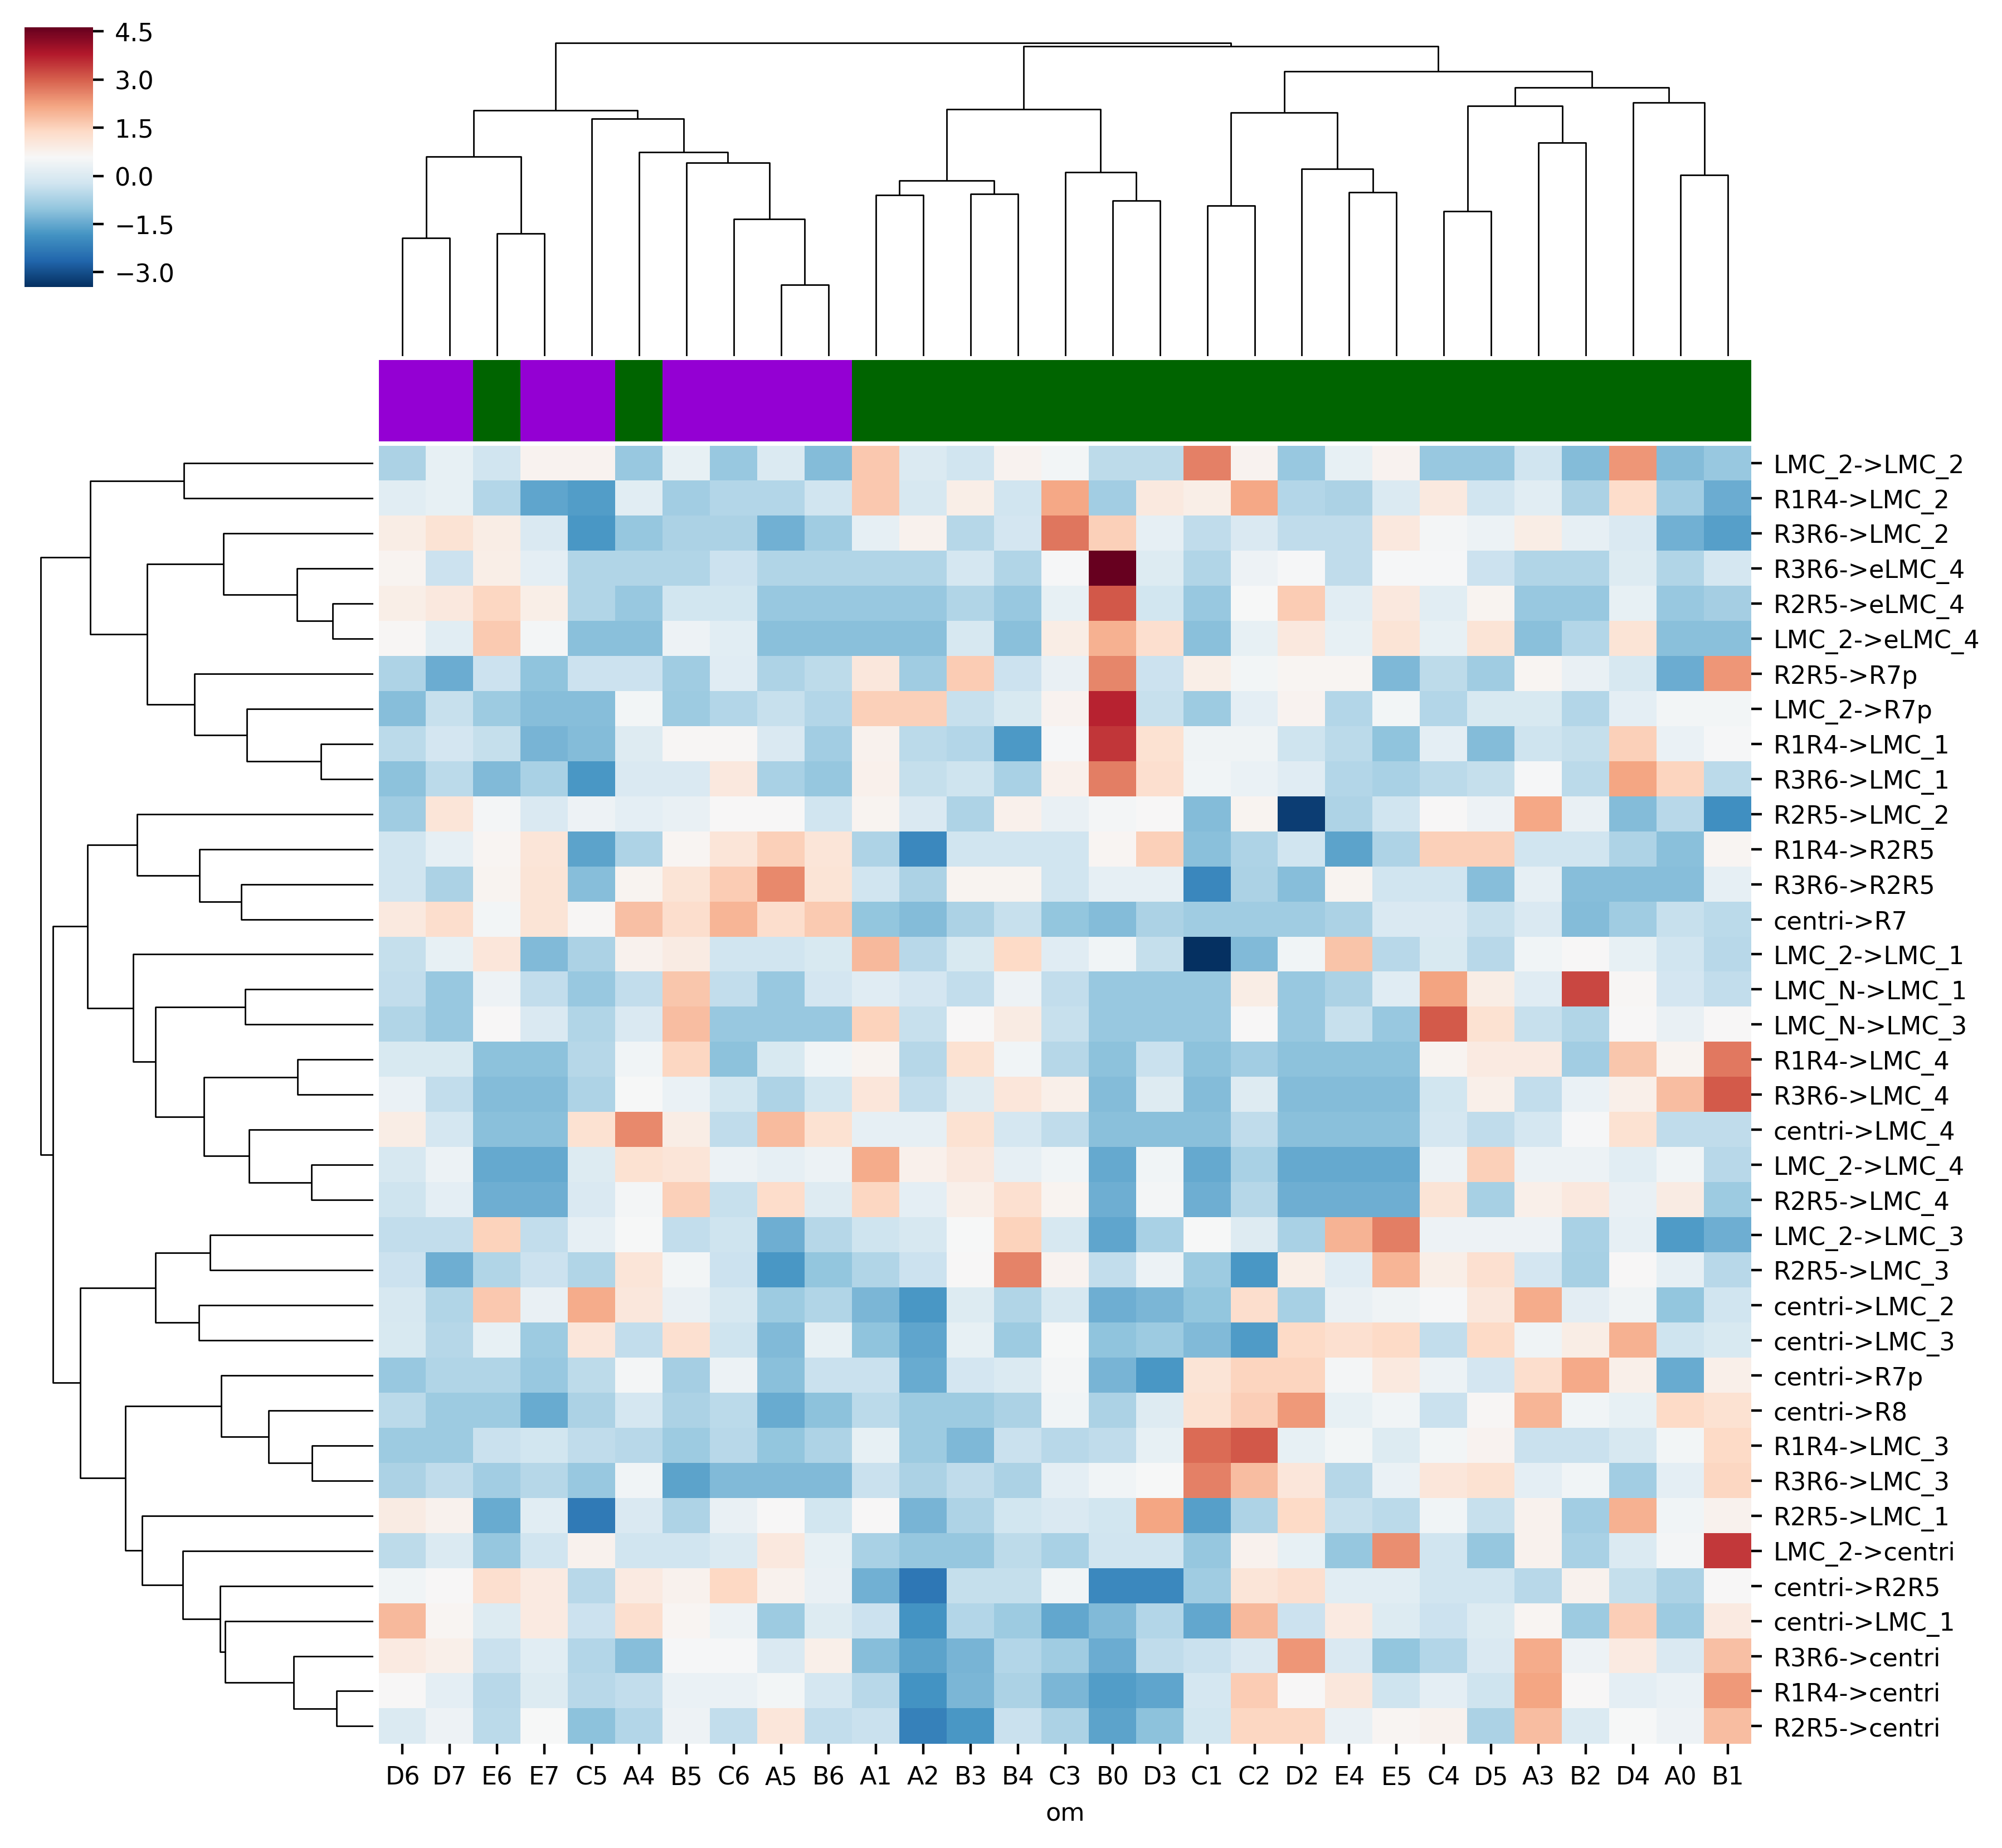

In [49]:
data = z_scores.T
c_list = om_colors(data.columns)
clus = sns.clustermap(data, col_colors=c_list, yticklabels=data.index, metric='cosine', method='average',
                      cmap='RdBu_r', label='z-score')
plt.show()

if save_figs:
    clus.savefig('/mnt/home/nchua/Dropbox/lamina_figures/om_clus_z-score_allcx.svg')
    clus.savefig('/mnt/home/nchua/Dropbox/lamina_figures/om_clus_z-score_allcx.png')

### Home connections

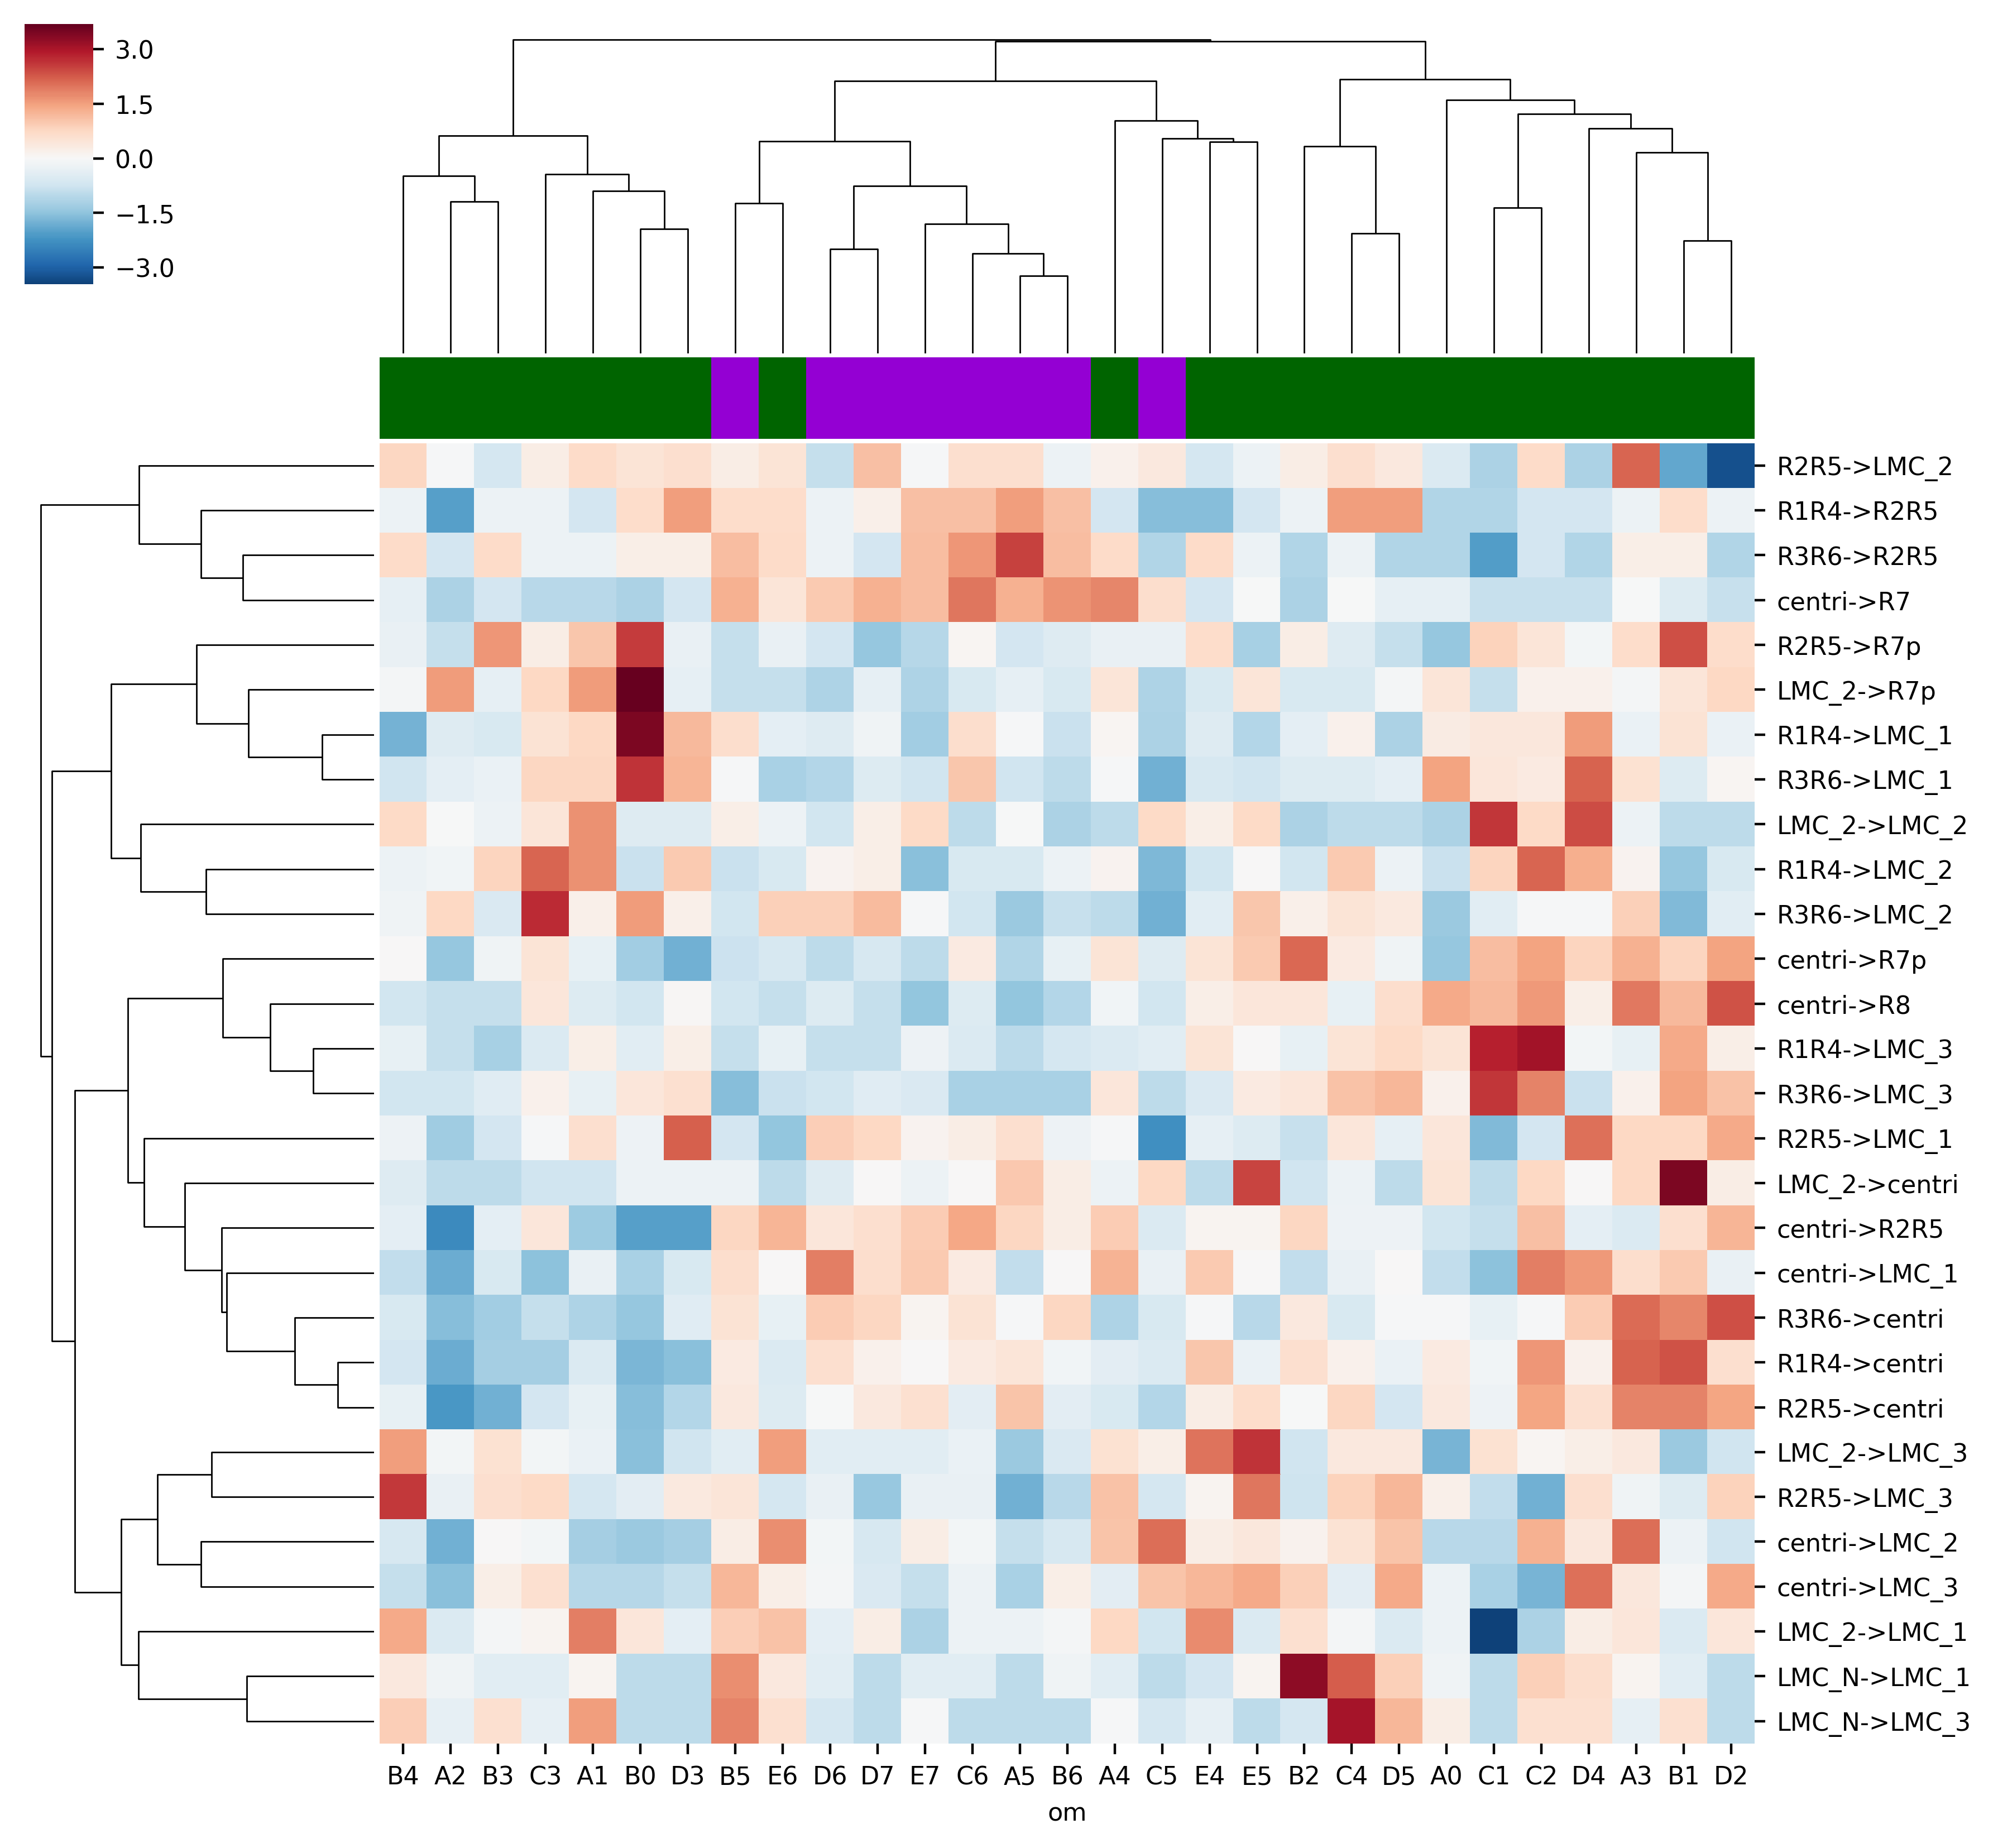

In [50]:
data = z_scores.loc[:, [i for i in cxvecs.columns if ('LMC_4' not in i) and ('eLMC_2' not in i)]].T
c_list = om_colors(data.columns)
clus = sns.clustermap(data, col_colors=c_list, yticklabels=data.index, metric='cosine', method='average',
                      cmap='RdBu_r', center=0)
plt.show()

if save_figs:
    clus.savefig('/mnt/home/nchua/Dropbox/lamina_figures/om_clus_z-score_homecx.svg')
    clus.savefig('/mnt/home/nchua/Dropbox/lamina_figures/om_clus_z-score_homecx.png')

## Clustering by correlation of connection counts

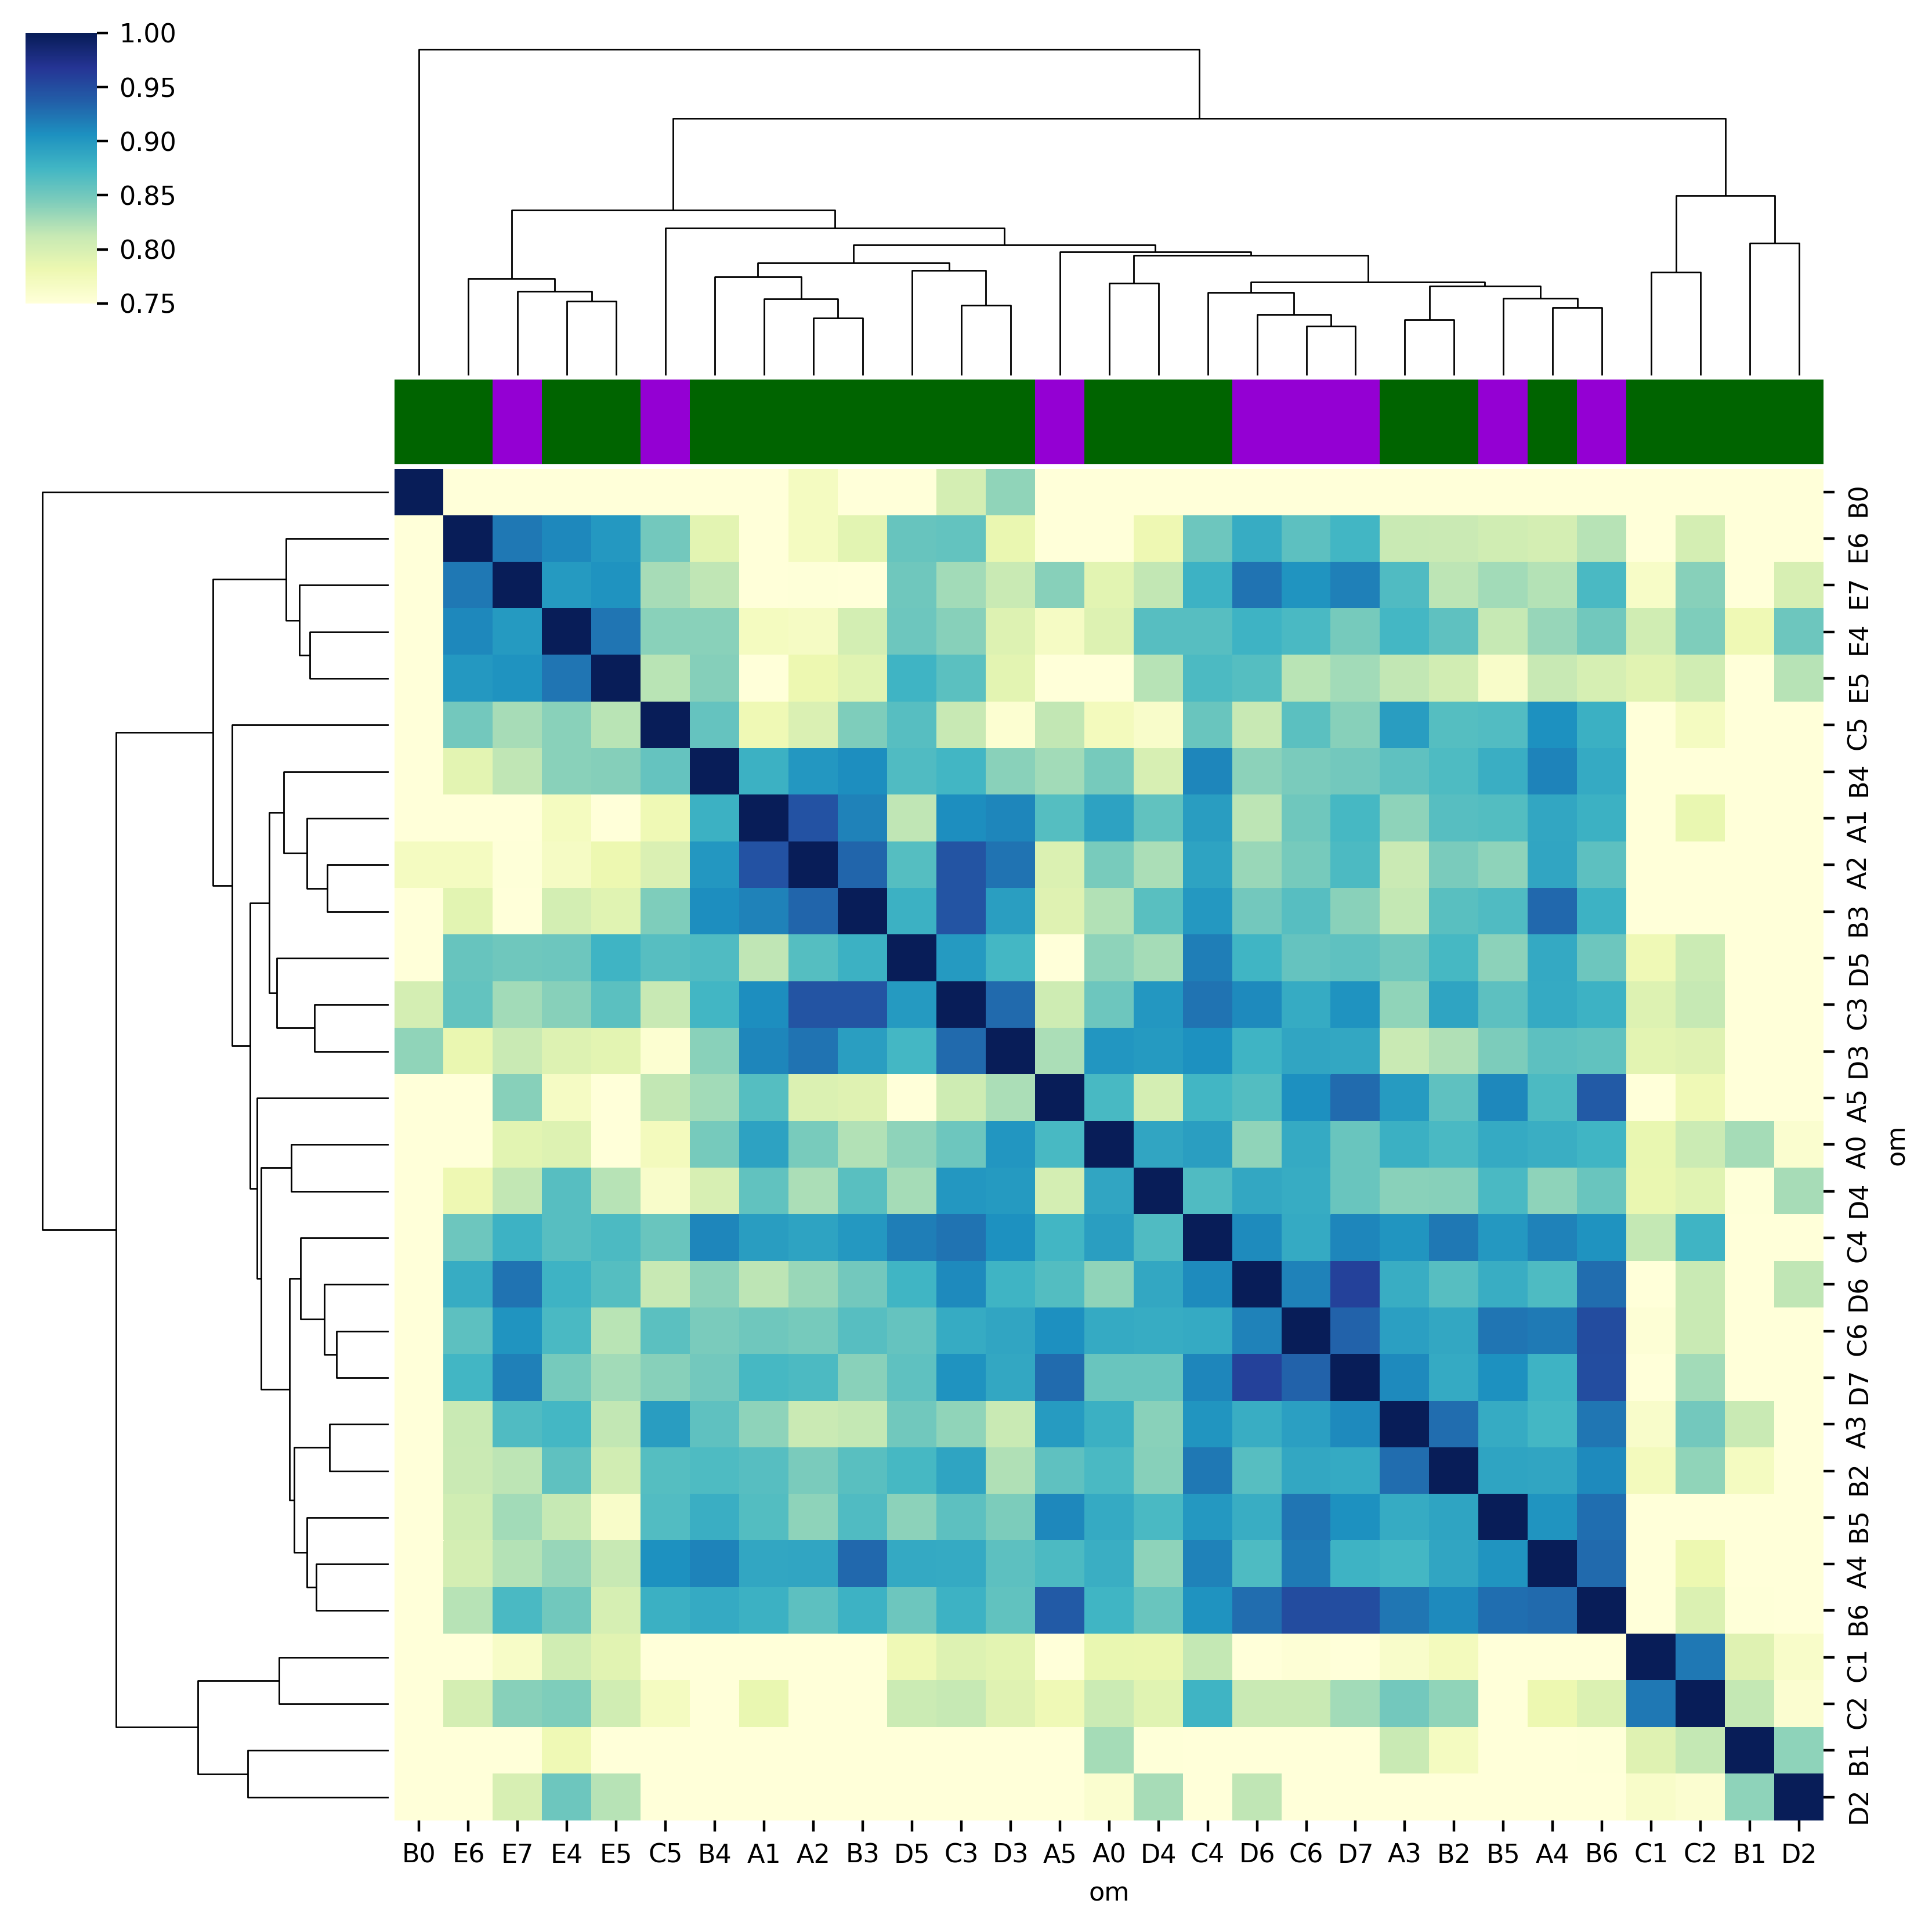

In [51]:
data = cxvecs.T.corr()
c_list = om_colors(data.columns)

clus = sns.clustermap(data, metric='euclidean', method='average',  # average = centroid linkage
                      col_colors=c_list, cmap='YlGnBu', vmin=0.75, vmax=1)

plt.show()

if save_figs:
    clus.savefig('/mnt/home/nchua/Dropbox/lamina_figures/om_clus_corr_allcx.svg')
    clus.savefig('/mnt/home/nchua/Dropbox/lamina_figures/om_clus_corr_allcx.png')

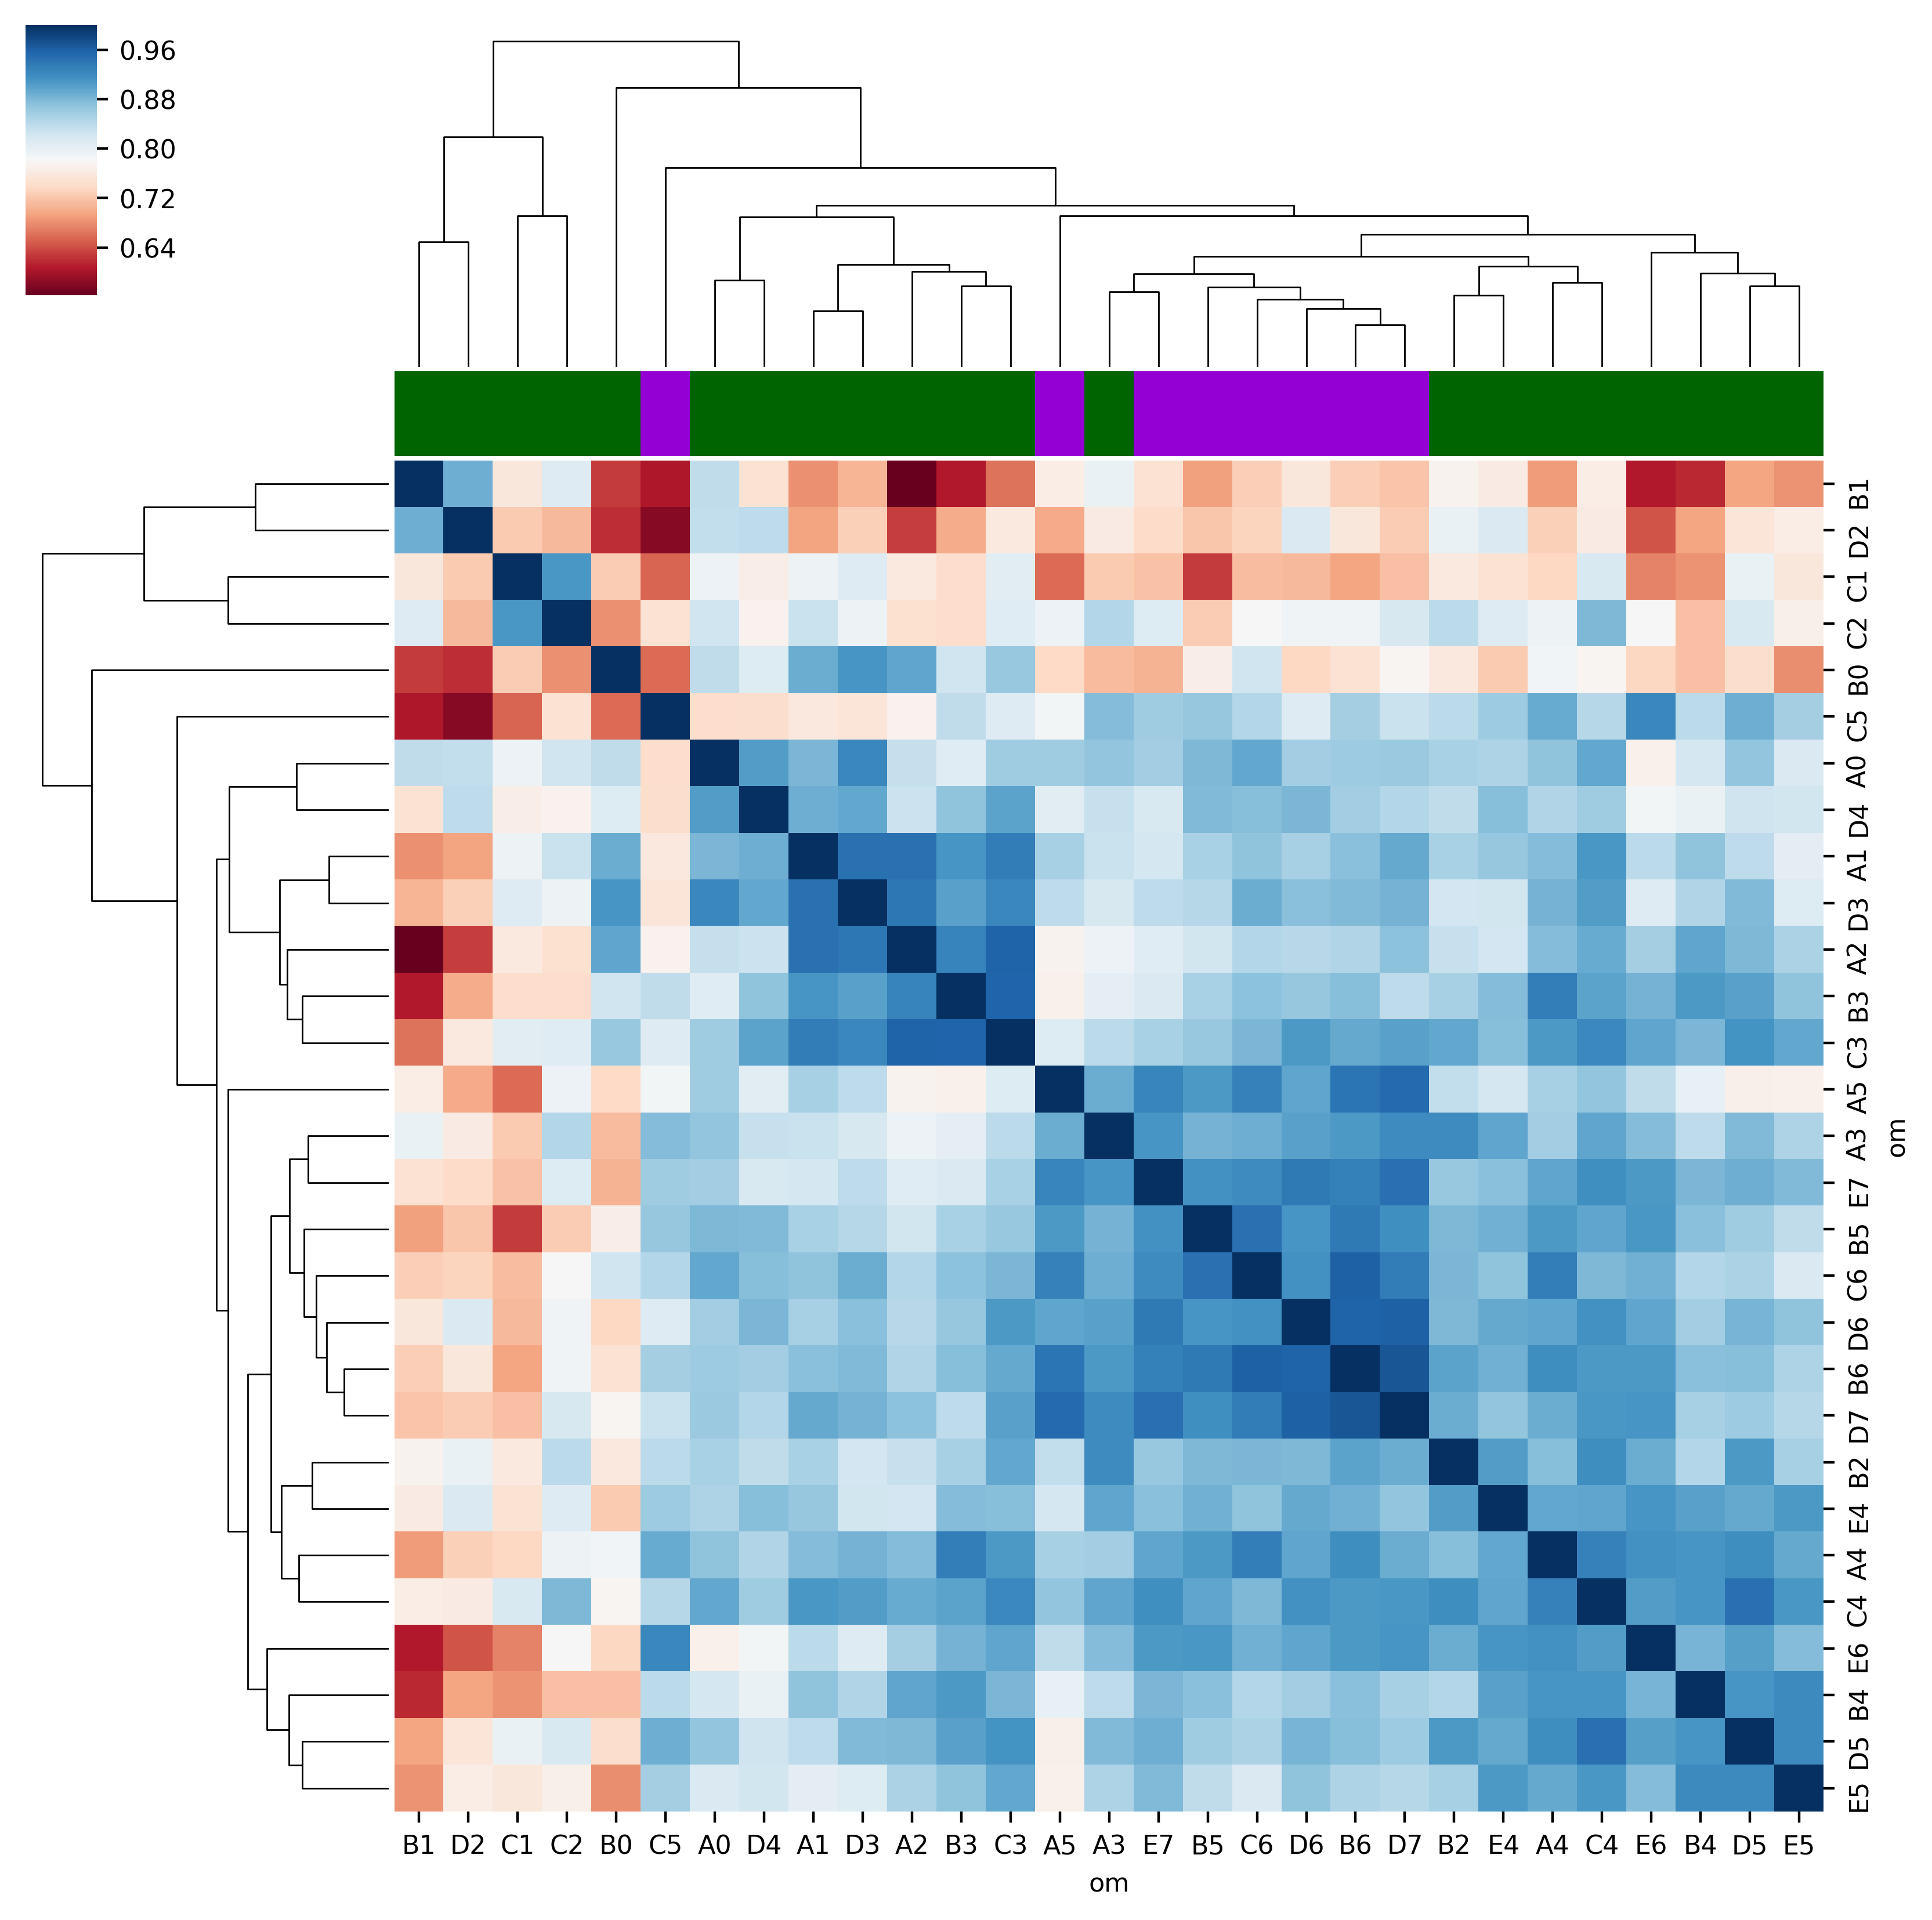

In [52]:
data = cxvecs.loc[:, [i for i in cxvecs.columns if ('LMC_4' not in i) and ('eLMC_2' not in i)]].T.corr()
#display(cxvecs.loc[:, [i for i in cxvecs.columns if ('LMC_4' not in i) and ('eLMC_2' not in i)]])
c_list = om_colors(data.columns)


sns.clustermap(data, metric='euclidean', method='average',  # average = centroid linkage
               col_colors=c_list, cmap='RdBu')

if save_figs:
    clus.savefig('/mnt/home/nchua/Dropbox/lamina_figures/om_clus_corr_homecx.svg')
    clus.savefig('/mnt/home/nchua/Dropbox/lamina_figures/om_clus_corr_homecx.png')